# GROUP PROJECT ON EXPLORATORY DATA ANALYSIS AND VISUALIZATIONS (GROUP 4)

In [2]:
#Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [3]:
#loading the datasets
df=pd.read_excel("shootings.xlsx")
#reading the first 5 items
df.head(5)



,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [4]:
#Converting the age column to an interger
df['age'] = df['age'].astype(int)
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22,M,White,Kansas City,MO,False,other,Other,False,Guns


In [5]:
#Extracting the year from the date to create a new column for years
df['year'] = df['date'].dt.year
df['year']

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
4890    2020
4891    2020
4892    2020
4893    2020
4894    2020
Name: year, Length: 4895, dtype: int64

In [6]:
#Replacing the Booleans in body_camera columns with Camera On and No camera 
df['body_camera'] = df['body_camera'].replace({True: 'Camera On', False: 'No Camera'})
df['body_camera']

0       No Camera
1       No Camera
2       No Camera
3       No Camera
4       No Camera
          ...    
4890    Camera On
4891    No Camera
4892    No Camera
4893    No Camera
4894    No Camera
Name: body_camera, Length: 4895, dtype: object

In [7]:
#Reading the last 5 items in the datasets
df.tail(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27,M,Black,Atlanta,GA,False,attack,Foot,Camera On,Electrical devices,2020
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23,M,Black,Crown Point,IN,False,attack,Car,No Camera,Guns,2020
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25,F,White,Sedalia,MO,False,other,Not fleeing,No Camera,Unarmed,2020
4893,5921,William Slyter,2020-06-13,shot,gun,22,M,White,Kansas City,MO,False,other,Other,No Camera,Guns,2020
4894,5924,Nicholas Hirsh,2020-06-15,shot,gun,31,M,White,Lawrence,KS,False,attack,Car,No Camera,Guns,2020


In [8]:
#Determing of Number of Rows and columns in the datasets
df.shape


(4895, 16)

In [9]:
#Describing the age column 
df['age'].describe()

count    4895.000000
mean       36.547702
std        12.694266
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

In [10]:
#Checking for missing values
print(df.isnull().sum())

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
year                       0
dtype: int64


In [11]:
#Counting the number of Males and females shot in the US police shooting 
g_count=df.groupby('gender')['gender'].count()
g_count

gender
F     222
M    4673
Name: gender, dtype: int64

In [12]:
#Determing the number of Males and Females by their manner of death
df.groupby(['manner_of_death','gender'])['manner_of_death'].count()

manner_of_death   gender
shot              F          216
                  M         4431
shot and Tasered  F            6
                  M          242
Name: manner_of_death, dtype: int64

In [13]:
#Determing the number of people shot acoording to their race 
df.groupby('race')['race'].count()

race
Asian         93
Black       1298
Hispanic     902
Native        78
Other         48
White       2476
Name: race, dtype: int64

In [14]:
#Determing the number of people that flee
df.groupby(['flee','gender']).size()

flee         gender
Car          F           48
             M          772
Foot         F            7
             M          635
Not fleeing  F          156
             M         2917
Other        F           11
             M          349
dtype: int64

In [15]:
#Top ten cities where the shooting occured
df['city'].value_counts().head(10)

Los Angeles     78
Phoenix         66
Houston         51
Las Vegas       41
San Antonio     40
Chicago         38
Columbus        36
Albuquerque     32
Jacksonville    31
St. Louis       30
Name: city, dtype: int64

In [16]:
# Determing the age range of people shot

# create bins for age ranges
bins = [0, 18, 60, 120]

# create labels for age ranges
labels = ['Below 18', '18 to 60', 'Above 60']

# use pd.cut() to bin the ages and assign labels to each bin
df['AgeRange'] = pd.cut(df['age'], bins=bins, labels=labels)

# use value_counts() to count the number of individuals in each age range
counts = df['AgeRange'].value_counts()

print(counts)

18 to 60    4469
Above 60     236
Below 18     190
Name: AgeRange, dtype: int64


# Visualization

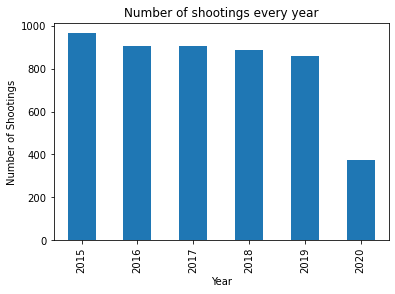

In [17]:
#Number of Shootings every year
year_counts =df['year'].value_counts().sort_index()
year_counts.plot(kind='bar', xlabel='Year', ylabel='Number of Shootings',title='Number of shootings every year')
plt.show()

In [18]:
# race_counts = df['race'].value_counts()
race_pie=dict(Counter(df['race']))
race_pie

{'Asian': 93,
 'White': 2476,
 'Hispanic': 902,
 'Black': 1298,
 'Other': 48,
 'Native': 78}

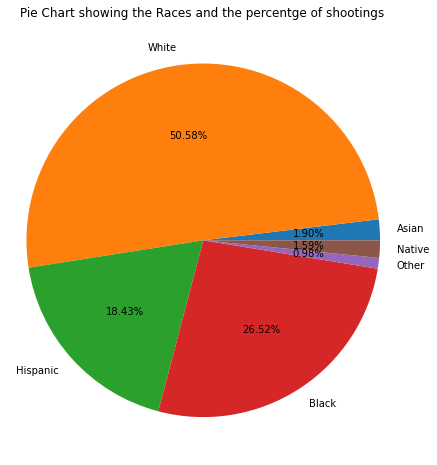

In [19]:
plt.figure(figsize=(7,8))

plt.pie(race_pie.values(), labels=race_pie.keys(), autopct='%1.2f%%')
plt.axis('equal')

#title of the chart
plt.title('Pie Chart showing the Races and the percentge of shootings')

plt.show()

In [20]:
cities=dict(Counter(df['city']).most_common(10))
cities

{'Los Angeles': 78,
 'Phoenix': 66,
 'Houston': 51,
 'Las Vegas': 41,
 'San Antonio': 40,
 'Chicago': 38,
 'Columbus': 36,
 'Albuquerque': 32,
 'Jacksonville': 31,
 'St. Louis': 30}

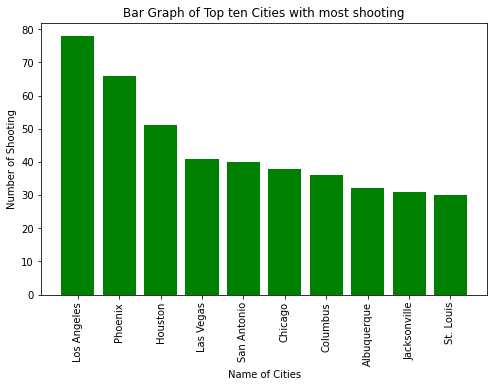

In [21]:
plt.figure(figsize=(8,5))

plt.bar(cities.keys(), cities.values(), color="green")


#labeling the axis
plt.xlabel('Name of Cities')
plt.ylabel('Number of Shooting')

#giving title
plt.title('Bar Graph of Top ten Cities with most shooting')


plt.xticks(rotation=90)
plt.show()

In [22]:
# Creating a Bar Chart
agerange=dict(Counter(df['AgeRange']).most_common())
agerange

{'18 to 60': 4469, 'Above 60': 236, 'Below 18': 190}

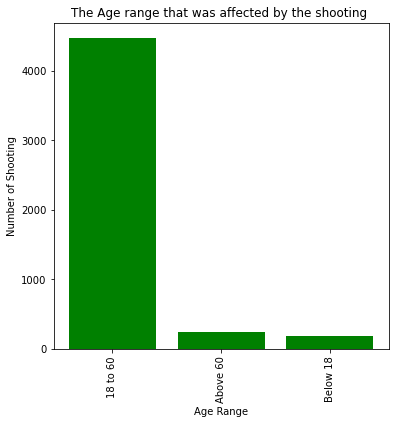

In [23]:
plt.figure(figsize=(6,6))

plt.bar(agerange.keys(), agerange.values(), color="green")


#labeling the axis
plt.xlabel('Age Range')
plt.ylabel('Number of Shooting')

#giving title
plt.title('The Age range that was affected by the shooting ')


plt.xticks(rotation=90)
plt.show()